In [2]:
library(dplyr)
library(tibble)
library(bnlearn)
library(bnstruct)
library(Rgraphviz)
library(infotheo)
std_width  <- 14
std_height <- 14
options(repr.plot.width = std_width, repr.plot.height = std_height)

# EARTHQUAKE

## Load dataset

In [17]:
data <- read.csv("earthquake.csv")
data <- data[, -1]

for (i in names(data)) {
    data <- data %>% 
            mutate_at(vars(i), funs(as.factor))  %>% 
            mutate_at(vars(i), funs(as.numeric))
}
head(data)

,Burglary,Earthquake,Alarm,JohnCalls,MaryCalls
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1,1,1,1
2,1,1,1,1,1
3,1,1,1,1,1
4,1,1,1,2,1
5,1,1,1,1,1
6,1,1,1,1,1


In [ ]:
discrete_data <- read.csv("earthquake.csv")
discrete_data <- discrete_data[, -1]

for (i in names(discrete_data)) {
    discrete_data <- discrete_data %>% 
            mutate_at(vars(i), funs(as.factor))
}
head(discrete_data)

In [4]:
bn_data <- BNDataset(
    data         = data,
    discreteness = rep(TRUE, ncol(data)),
    variables    = names(data),
    node.sizes   = rep(2, ncol(data)),
    starts.from  = 1
)
print(bn_data)


Dataset: 

num.variables 5

variables
Burglary Earthquake Alarm JohnCalls MaryCalls
discreteness
TRUE TRUE TRUE TRUE TRUE
node.sizes
2 2 2 2 2
num.items
1000000
imputation
FALSE
has.boots
FALSE
has.imputed.boots
FALSE
num.boots
0


## Learn structure and parameters using K2 score function

In [5]:
bnet <- learn.network(
    bn_data,
    scoring.func = "k2", # custom!
    algo         = "hc"
)

print(bnet)

bnstruct :: learning the structure using HC ...

bnstruct :: learning using HC completed.

bnstruct :: learning network parameters ... 

bnstruct :: parameter learning done.




Bayesian Network: BNDataset

num.nodes 5

variables
Burglary Earthquake Alarm JohnCalls MaryCalls
discreteness
TRUE TRUE TRUE TRUE TRUE
node.sizes
2 2 2 2 2
Adjacency matrix:
           Burglary Earthquake Alarm JohnCalls MaryCalls
Burglary          0          0     1         0         0
Earthquake        0          0     1         0         0
Alarm             0          0     0         1         1
JohnCalls         0          0     0         0         0
MaryCalls         0          0     0         0         0

Conditional probability tables:$Burglary
Burglary
         1          2 
0.99013051 0.00986949 

$Earthquake
Earthquake
         1          2 
0.98001352 0.01998648 

$Alarm
, , Alarm = 1

        Earthquake
Burglary          1          2
       1 0.99901671 0.70836439
       2 0.06554094 0.03153153

, , Alarm = 2

        Earthquake
Burglary            1         2
       1 0.0009832901 0.2916356
       2 0.9344590579 0.9684685


$JohnCalls
     JohnCalls
Alarm         1      

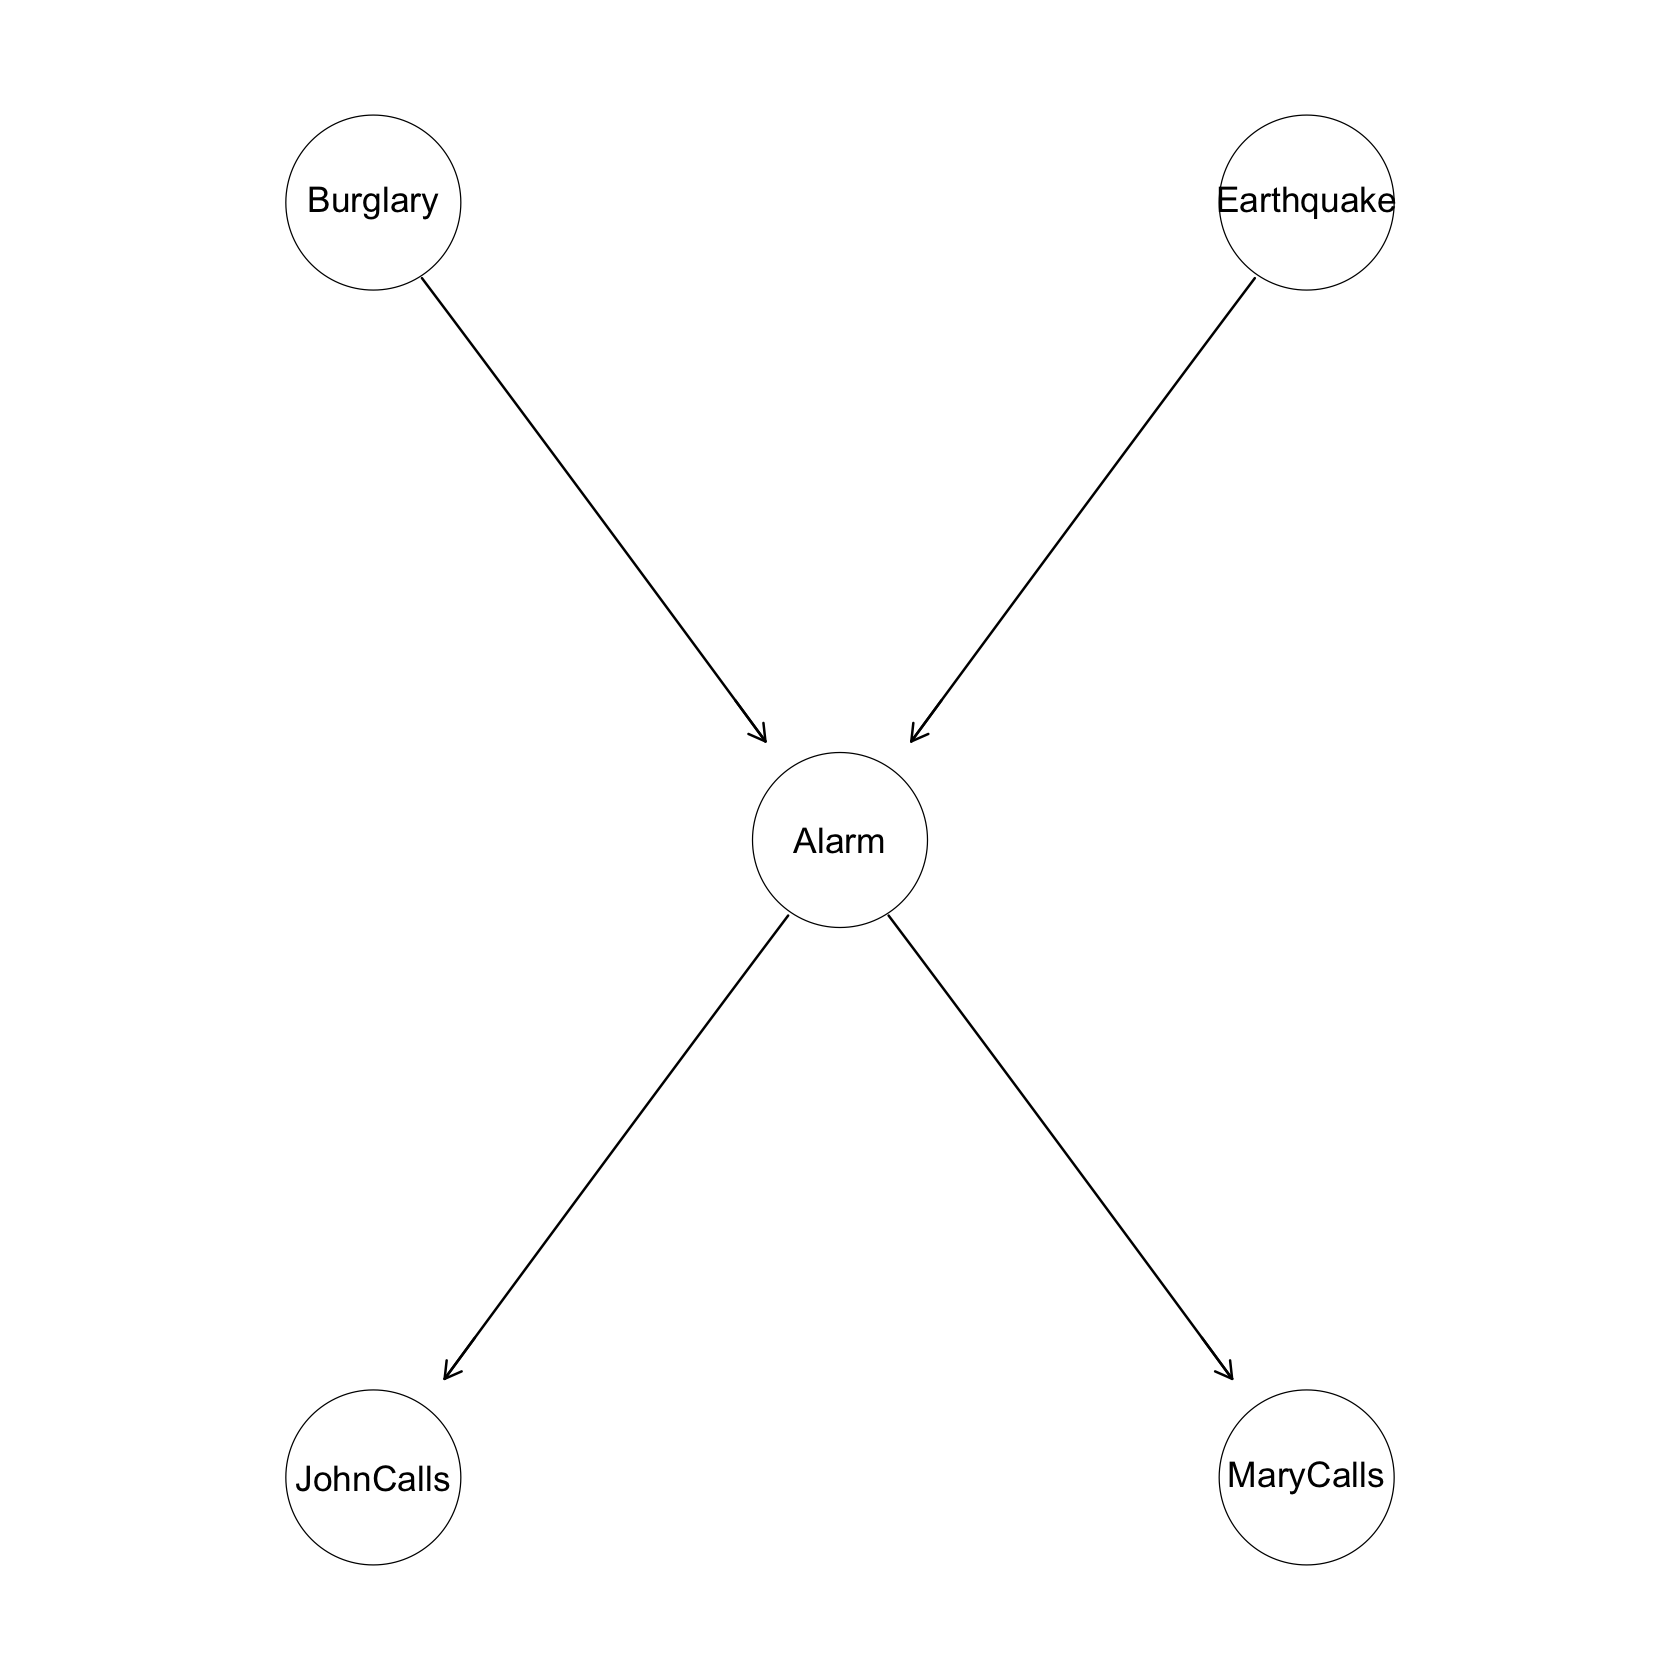

In [7]:
par(bg = "white")
plot(bnet, node.size.lab=32)

In [35]:
graph       <- empty.graph(variables(bnet))
amat(graph) <- dag(bnet)

In [37]:
score(graph, discrete_data, type="k2")

[1] -441633.1

In [29]:
fit <- bn.fit(graph, data = discrete_data, method = "bayes")
print(fit)


  Bayesian network parameters

  Parameters of node Burglary (multinomial distribution)

Conditional probability table:
      False       True 
0.99013051 0.00986949 

  Parameters of node Earthquake (multinomial distribution)

Conditional probability table:
      False       True 
0.98001352 0.01998648 

  Parameters of node Alarm (multinomial distribution)

Conditional probability table:
 
, , Earthquake = False

       Burglary
Alarm          False         True
  False 0.9990167099 0.0655409421
  True  0.0009832901 0.9344590579

, , Earthquake = True

       Burglary
Alarm          False         True
  False 0.7083643850 0.0315315315
  True  0.2916356150 0.9684684685


  Parameters of node JohnCalls (multinomial distribution)

Conditional probability table:
 
         Alarm
JohnCalls      False       True
    False 0.94958033 0.10255084
    True  0.05041967 0.89744916

  Parameters of node MaryCalls (multinomial distribution)

Conditional probability table:
 
         Alarm
MaryCal

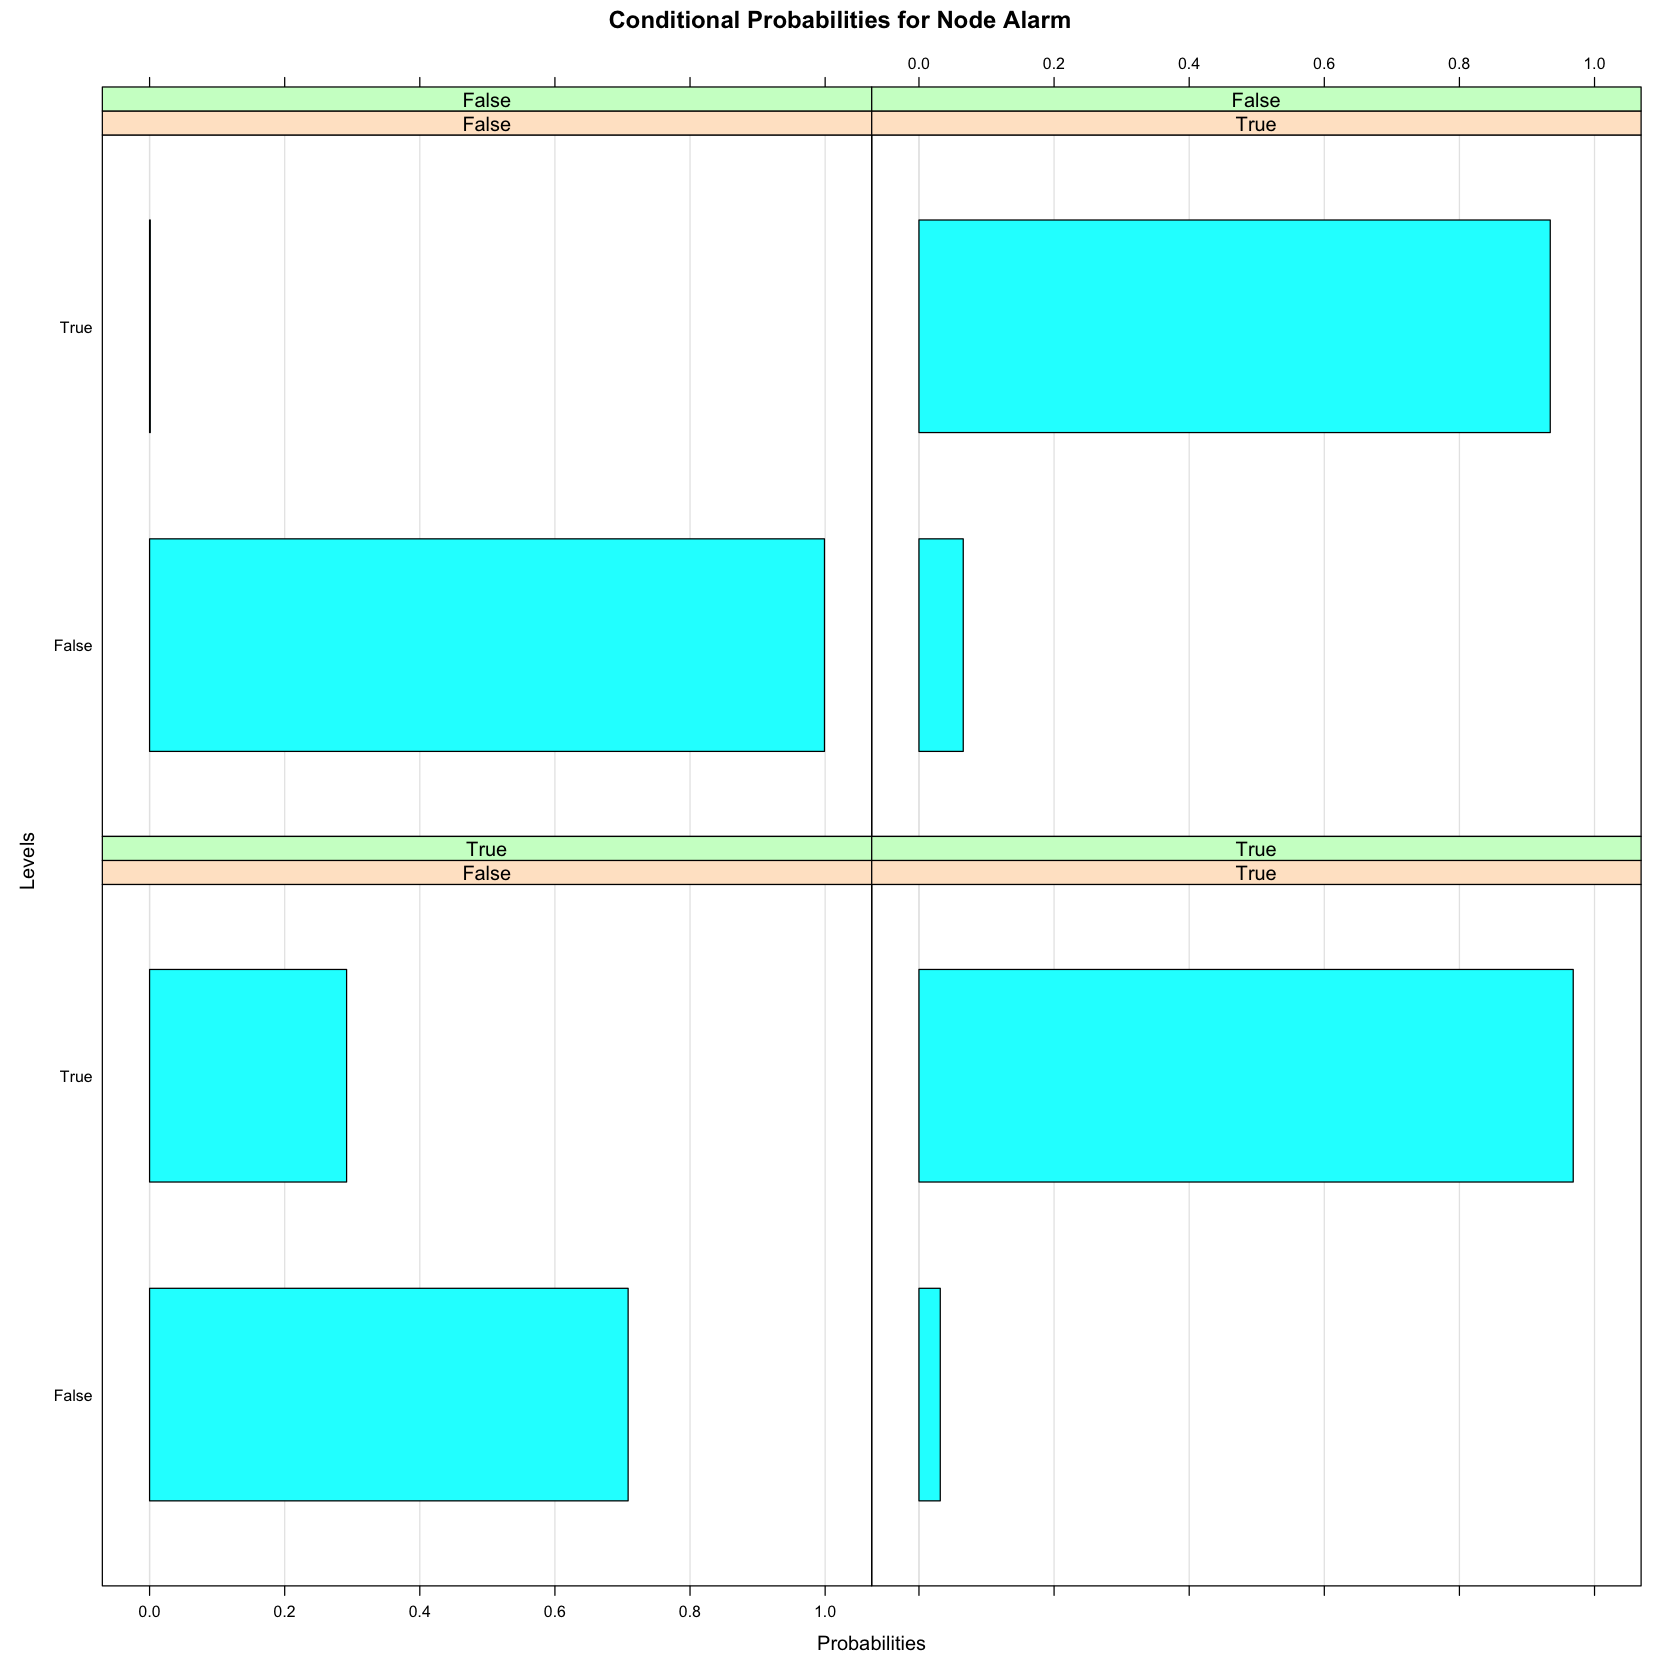

In [32]:
bn.fit.barchart(fit$Alarm)

## Learn structure and parameters through K2 algorithm

In [8]:
net <- k2.learn.net(bn_data, max.parents = 2)
print(net)

bnstruct :: learning network parameters ... 

bnstruct :: parameter learning done.




Bayesian Network: BNDataset

num.nodes 5

variables
Burglary Earthquake Alarm JohnCalls MaryCalls
discreteness
TRUE TRUE TRUE TRUE TRUE
node.sizes
2 2 2 2 2
Adjacency matrix:
           Burglary Earthquake Alarm JohnCalls MaryCalls
Burglary          0          0     1         0         0
Earthquake        0          0     1         0         0
Alarm             0          0     0         1         1
JohnCalls         0          0     0         0         0
MaryCalls         0          0     0         0         0

Conditional probability tables:$Burglary
Burglary
         1          2 
0.99013051 0.00986949 

$Earthquake
Earthquake
         1          2 
0.98001352 0.01998648 

$Alarm
, , Alarm = 1

        Earthquake
Burglary          1          2
       1 0.99901671 0.70836439
       2 0.06554094 0.03153153

, , Alarm = 2

        Earthquake
Burglary            1         2
       1 0.0009832901 0.2916356
       2 0.9344590579 0.9684685


$JohnCalls
     JohnCalls
Alarm         1      

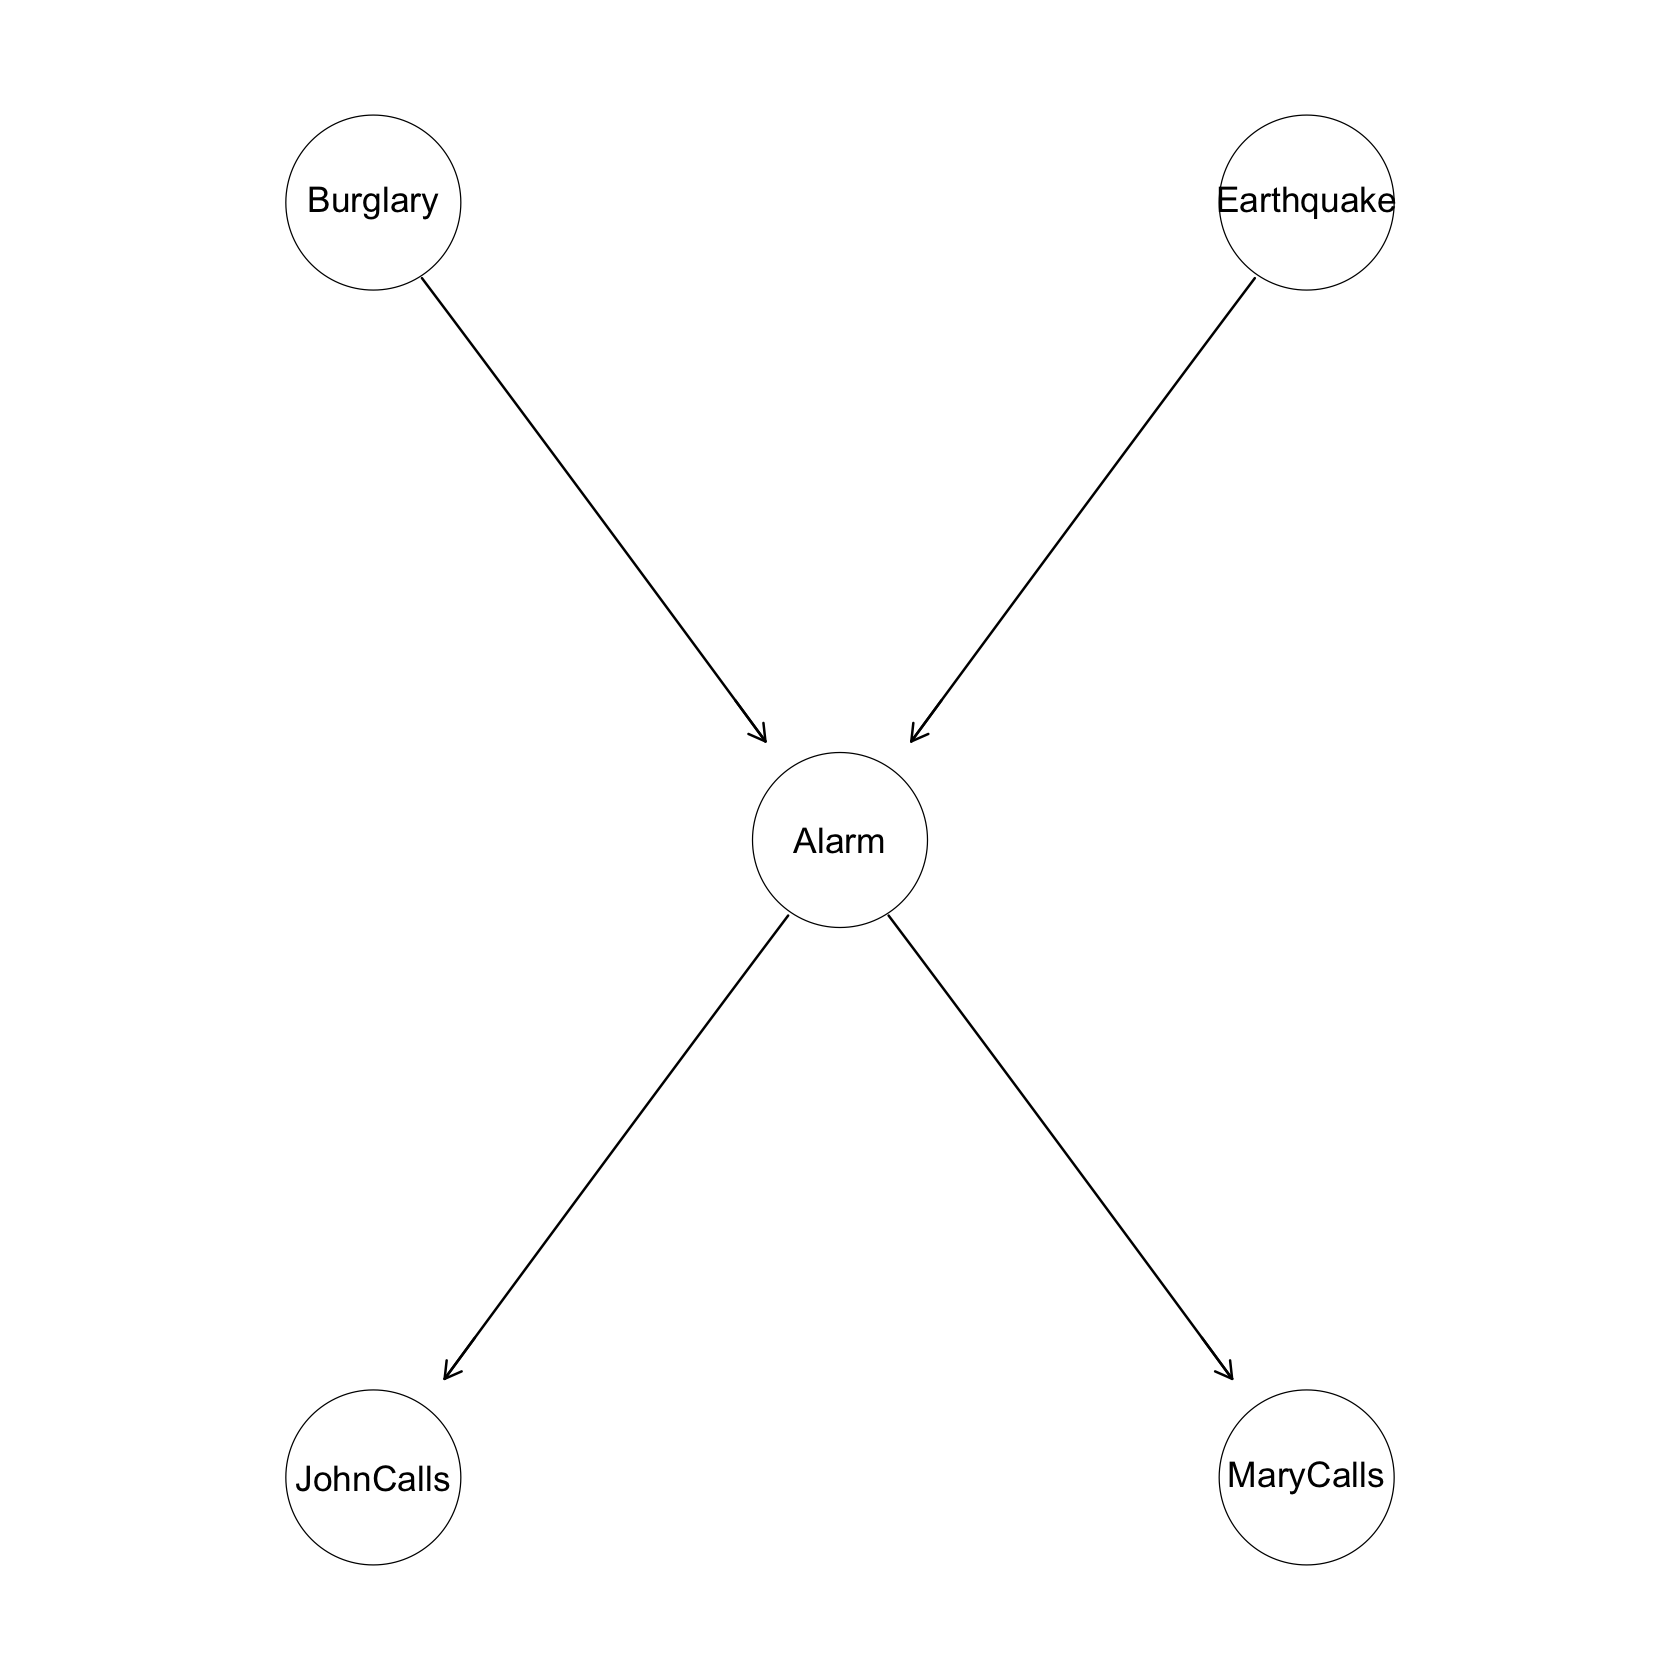

In [9]:
par(bg = "white")
plot(net, node.size.lab=32)

In [38]:
graph       <- empty.graph(variables(net))
amat(graph) <- dag(net)

In [39]:
score(graph, discrete_data, type="k2")

[1] -441633.1

In [40]:
fit <- bn.fit(graph, data = discrete_data, method = "bayes")
print(fit)


  Bayesian network parameters

  Parameters of node Burglary (multinomial distribution)

Conditional probability table:
      False       True 
0.99013051 0.00986949 

  Parameters of node Earthquake (multinomial distribution)

Conditional probability table:
      False       True 
0.98001352 0.01998648 

  Parameters of node Alarm (multinomial distribution)

Conditional probability table:
 
, , Earthquake = False

       Burglary
Alarm          False         True
  False 0.9990167099 0.0655409421
  True  0.0009832901 0.9344590579

, , Earthquake = True

       Burglary
Alarm          False         True
  False 0.7083643850 0.0315315315
  True  0.2916356150 0.9684684685


  Parameters of node JohnCalls (multinomial distribution)

Conditional probability table:
 
         Alarm
JohnCalls      False       True
    False 0.94958033 0.10255084
    True  0.05041967 0.89744916

  Parameters of node MaryCalls (multinomial distribution)

Conditional probability table:
 
         Alarm
MaryCal

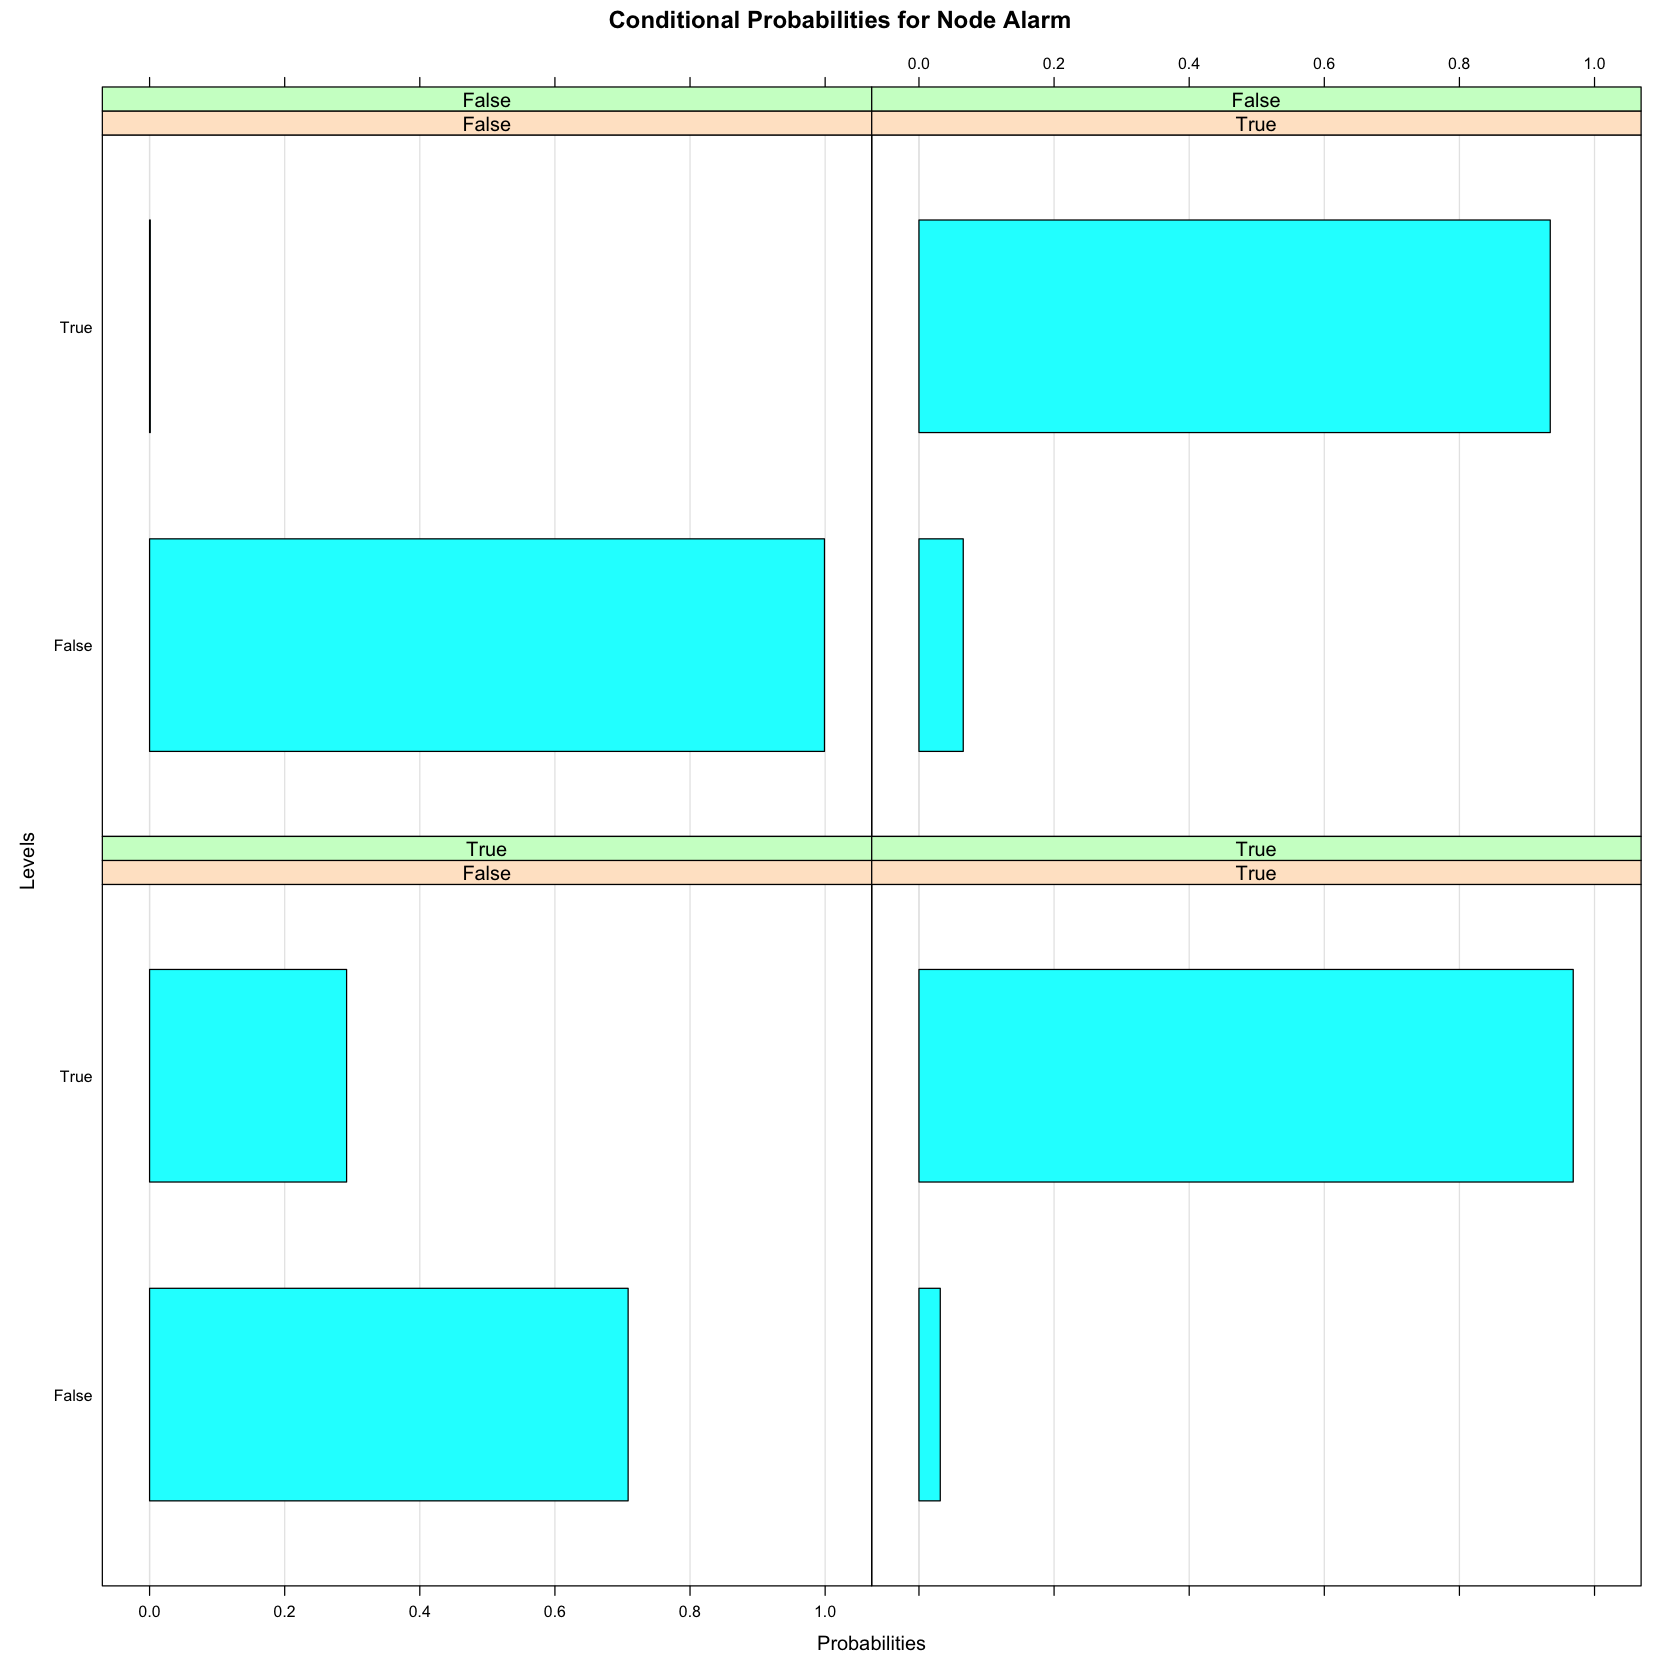

In [34]:
bn.fit.barchart(fit$Alarm)

# CHILD

## Ordering functions

In [45]:
MI_data <- function(x_index, y_index, dataset){
    mutinformation(dataset[,x_index], dataset[,y_index])
}

## Load dataset

In [41]:
data <- read.csv("child.csv")

for (i in names(data)) {
    data <- data %>% 
            mutate_at(vars(i), funs(as.factor))  %>% 
            mutate_at(vars(i), funs(as.numeric))
}
head(data)

,BirthAsphyxia,HypDistrib,HypoxiaInO2,CO2,ChestXray,Grunting,LVHreport,LowerBodyO2,RUQO2,CO2Report,XrayReport,Disease,GruntingReport,Age,LVH,DuctFlow,CardiacMixing,LungParench,LungFlow,Sick
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,2,2,3,3,1,1,3,2,1,3,1,1,2,1,1,1,3,1,1
2,1,1,1,3,1,2,1,3,2,1,1,1,2,2,1,1,2,1,2,1
3,1,1,3,3,4,1,1,2,1,1,3,3,1,1,1,1,1,3,2,1
4,1,1,2,3,4,1,1,2,2,1,4,1,1,2,1,1,1,3,2,1
5,1,1,3,3,3,1,2,2,3,1,3,3,1,3,2,1,1,3,3,1
6,1,1,2,3,4,1,2,2,2,1,4,3,1,3,2,1,1,3,2,2


## Ordering data

In [46]:
# initalize order (choose first variable) <- for ALARM we use MVS (16th variable)
order_auto <- c(1)
all_nodes <- seq(ncol(data))

# Compute matrix of mutual information
#MI_matrix <- mapply(MI_data, all_nodes, all_nodes, MoreArgs=(list(data)))
MI_matrix <- matrix(rep(0,length(all_nodes)**2), ncol=length(all_nodes))
for(node in all_nodes){
    MI_matrix[node,] <- sapply(all_nodes, MI_data, y_index=node, dataset=data)
}
MI_sum <- matrix(rowSums(MI_matrix),nrow=1)
print(MI_sum)

# For each turn, add to `order` the node with max MI
while (length(order_auto) != ncol(data)) {
    
    # list all the nodes that haven't been ordered
    node_list <- all_nodes[-order_auto]

    # Compute MI values for these nodes and the last one in `order`
    MI_values <- sapply(node_list, MI_data, y_index=tail(order_auto,1), dataset=data)

    # Find which node has the max MI and add it to `order`
    best_node <- node_list[which.max(MI_values)]
    order_auto <- c(order_auto, best_node)
}

# Print order
cat('The final order is: ')
cat(order_auto)

          [,1]      [,2]     [,3]     [,4]     [,5]     [,6]    [,7]     [,8]
[1,] 0.3618664 0.4981645 1.599948 1.197525 3.580196 1.069364 1.32861 1.104803
         [,9]     [,10]    [,11]    [,12]     [,13]    [,14]   [,15]    [,16]
[1,] 1.153659 0.9154616 2.999156 4.268598 0.9310802 1.125939 1.48137 2.263153
       [,17]    [,18]    [,19]   [,20]
[1,] 2.68807 1.685201 2.587396 0.77809
The final order is: 1 12 17 16 19 5 11 18 6 13 20 14 15 7 3 9 8 2 4 10

In [47]:
# perfect ordering
order_manual <- c(
    1, 12, 20, 14, 16, 17, 18, 19, 15, 6, 2, 3, 4, 5, 7, 13, 8, 9, 10, 11 
)

In [48]:
ordered_data <- data[, order_manual]
head(ordered_data)

,BirthAsphyxia,Disease,Sick,Age,DuctFlow,CardiacMixing,LungParench,LungFlow,LVH,Grunting,HypDistrib,HypoxiaInO2,CO2,ChestXray,LVHreport,GruntingReport,LowerBodyO2,RUQO2,CO2Report,XrayReport
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1,1,2,1,1,3,1,1,1,2,2,3,3,1,1,3,2,1,3
2,1,1,1,2,1,2,1,2,1,2,1,1,3,1,1,2,3,2,1,1
3,1,3,1,1,1,1,3,2,1,1,1,3,3,4,1,1,2,1,1,3
4,1,1,1,2,1,1,3,2,1,1,1,2,3,4,1,1,2,2,1,4
5,1,3,1,3,1,1,3,3,2,1,1,3,3,3,2,1,2,3,1,3
6,1,3,2,3,1,1,3,2,2,1,1,2,3,4,2,1,2,2,1,4


## Ordering discrete data

In [49]:
discrete_data <- read.csv("child.csv")

discrete_data <- discrete_data[, order_manual]

for (i in names(discrete_data)) {
    discrete_data <- discrete_data %>% 
            mutate_at(vars(i), funs(as.factor))
}
head(discrete_data)

,BirthAsphyxia,Disease,Sick,Age,DuctFlow,CardiacMixing,LungParench,LungFlow,LVH,Grunting,HypDistrib,HypoxiaInO2,CO2,ChestXray,LVHreport,GruntingReport,LowerBodyO2,RUQO2,CO2Report,XrayReport
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,no,Fallot,no,11-30_days,Lt_to_Rt,Complete,Normal,High,no,no,Unequal,Moderate,Normal,Normal,no,no,<5,5-12,<7.5,Normal
2,no,Fallot,no,11-30_days,Lt_to_Rt,Mild,Abnormal,Low,no,yes,Equal,Mild,Normal,Asy/Patch,no,yes,<5,5-12,<7.5,Asy/Patchy
3,no,PAIVS,no,0-3_days,Lt_to_Rt,Complete,Normal,Low,no,no,Equal,Severe,Normal,Oligaemic,no,no,5-12,12+,<7.5,Normal
4,no,Fallot,no,11-30_days,Lt_to_Rt,Complete,Normal,Low,no,no,Equal,Moderate,Normal,Oligaemic,no,no,5-12,5-12,<7.5,Oligaemic
5,no,PAIVS,no,4-10_days,Lt_to_Rt,Complete,Normal,Normal,yes,no,Equal,Severe,Normal,Normal,yes,no,5-12,<5,<7.5,Normal
6,no,PAIVS,yes,4-10_days,Lt_to_Rt,Complete,Normal,Low,yes,no,Equal,Moderate,Normal,Oligaemic,yes,no,5-12,5-12,<7.5,Oligaemic


## Building BNDataset

In [50]:
card <- c()
possibilities <- list()
for (i in 1:ncol(ordered_data)) { 
    card <- c(card, length(unique(ordered_data[, i])))
    possibilities <- append(possibilities, list(unique(ordered_data[, i])))
}

bn_data <- BNDataset(
    data         = ordered_data,
    discreteness = rep(TRUE, ncol(ordered_data)),
    variables    = names(ordered_data),
    node.sizes   = card,
    starts.from  = 1
)
print(bn_data)


Dataset: 

num.variables 20

variables
BirthAsphyxia Disease Sick Age DuctFlow CardiacMixing LungParench LungFlow LVH Grunting HypDistrib HypoxiaInO2 CO2 ChestXray LVHreport GruntingReport LowerBodyO2 RUQO2 CO2Report XrayReport
discreteness
TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
node.sizes
2 6 2 3 3 4 3 3 2 2 2 3 3 5 2 2 3 3 2 5
num.items
50000
imputation
FALSE
has.boots
FALSE
has.imputed.boots
FALSE
num.boots
0


## Learn structure and parameters using K2 score function

In [51]:
bnet <- learn.network(
    bn_data,
    scoring.func = "k2", # custom!
    algo         = "hc"
)

print(bnet)

bnstruct :: learning the structure using HC ...

bnstruct :: learning using HC completed.

bnstruct :: learning network parameters ... 

bnstruct :: parameter learning done.




Bayesian Network: BNDataset

num.nodes 20

variables
BirthAsphyxia Disease Sick Age DuctFlow CardiacMixing LungParench LungFlow LVH Grunting HypDistrib HypoxiaInO2 CO2 ChestXray LVHreport GruntingReport LowerBodyO2 RUQO2 CO2Report XrayReport
discreteness
TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
node.sizes
2 6 2 3 3 4 3 3 2 2 2 3 3 5 2 2 3 3 2 5
Adjacency matrix:
               BirthAsphyxia Disease Sick Age DuctFlow CardiacMixing
BirthAsphyxia              0       1    0   0        0             0
Disease                    0       0    1   1        1             1
Sick                       0       0    0   0        0             0
Age                        0       0    1   0        0             0
DuctFlow                   0       0    0   0        0             0
CardiacMixing              0       0    0   0        0             0
LungParench                0       0    0   0        0             0
LungFlow               

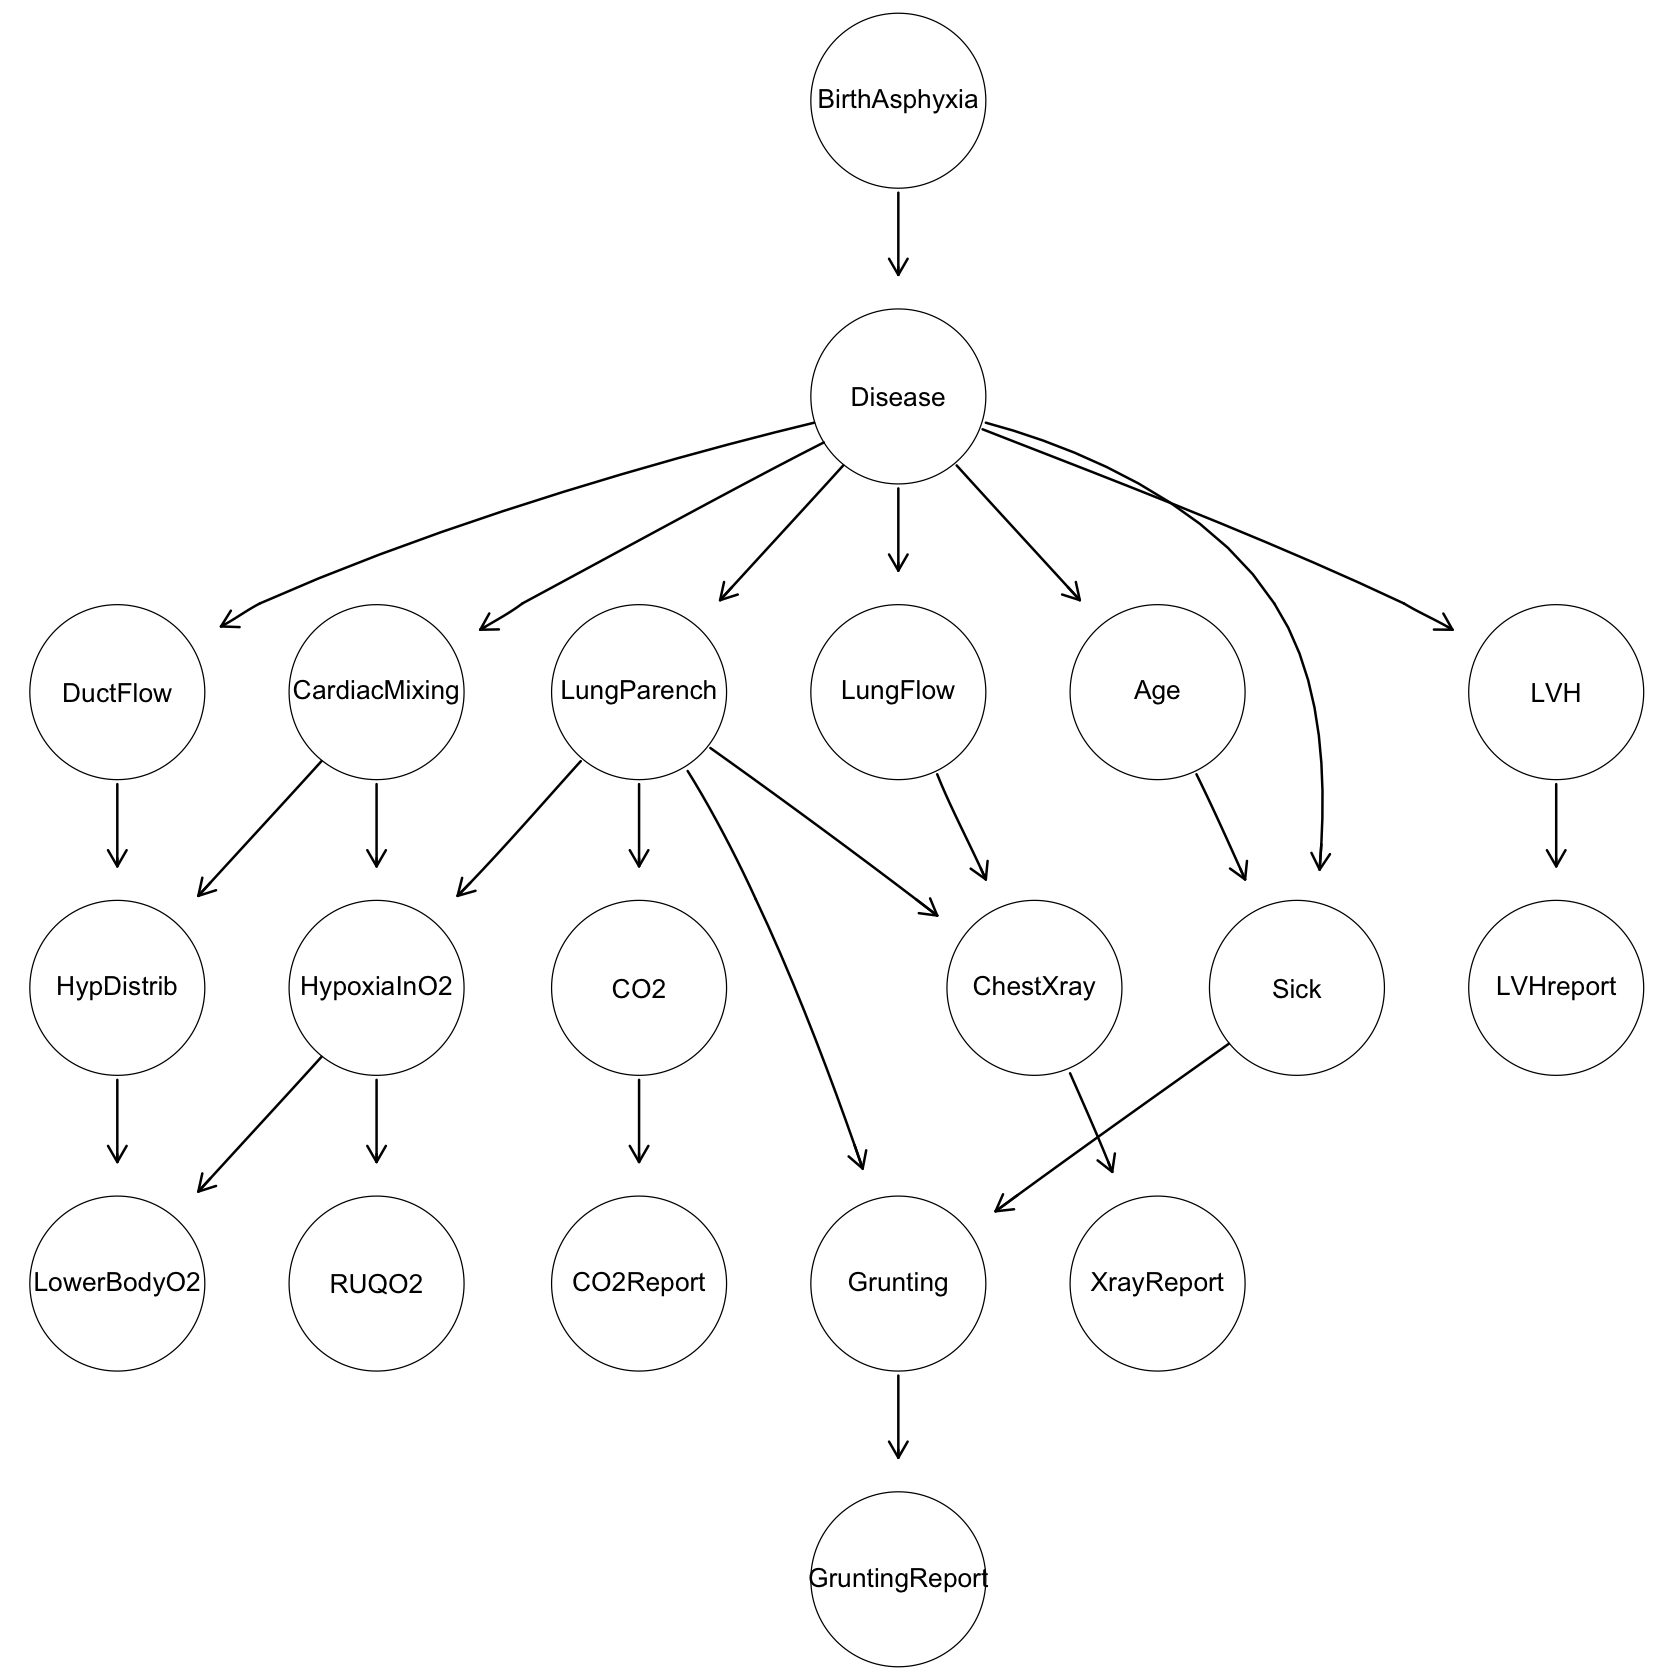

In [52]:
par(bg = "white")
plot(bnet, node.size.lab=32)

In [53]:
graph       <- empty.graph(variables(bnet))
amat(graph) <- dag(bnet)

In [54]:
score(graph, discrete_data, type="k2")

[1] -610163.6

In [55]:
fit <- bn.fit(graph, data = discrete_data, method = "bayes")
print(fit)


  Bayesian network parameters

  Parameters of node BirthAsphyxia (multinomial distribution)

Conditional probability table:
       no      yes 
0.900232 0.099768 

  Parameters of node Disease (multinomial distribution)

Conditional probability table:
 
        BirthAsphyxia
Disease          no        yes
  Fallot 0.29536425 0.23415522
  Lung   0.05176525 0.05073335
  PAIVS  0.23349255 0.15276803
  PFC    0.03148200 0.19767131
  TAPVD  0.05047672 0.05333935
  TGA    0.33741924 0.31133273

  Parameters of node Sick (multinomial distribution)

Conditional probability table:
 
, , Age = 0-3_days

     Disease
Sick      Fallot       Lung      PAIVS        PFC      TAPVD        TGA
  no  0.59405631 0.28302416 0.70763846 0.58197652 0.26670696 0.67138962
  yes 0.40594369 0.71697584 0.29236154 0.41802348 0.73329304 0.32861038

, , Age = 11-30_days

     Disease
Sick      Fallot       Lung      PAIVS        PFC      TAPVD        TGA
  no  0.92871635 0.34298176 0.71658478 0.72926192 0.50632689

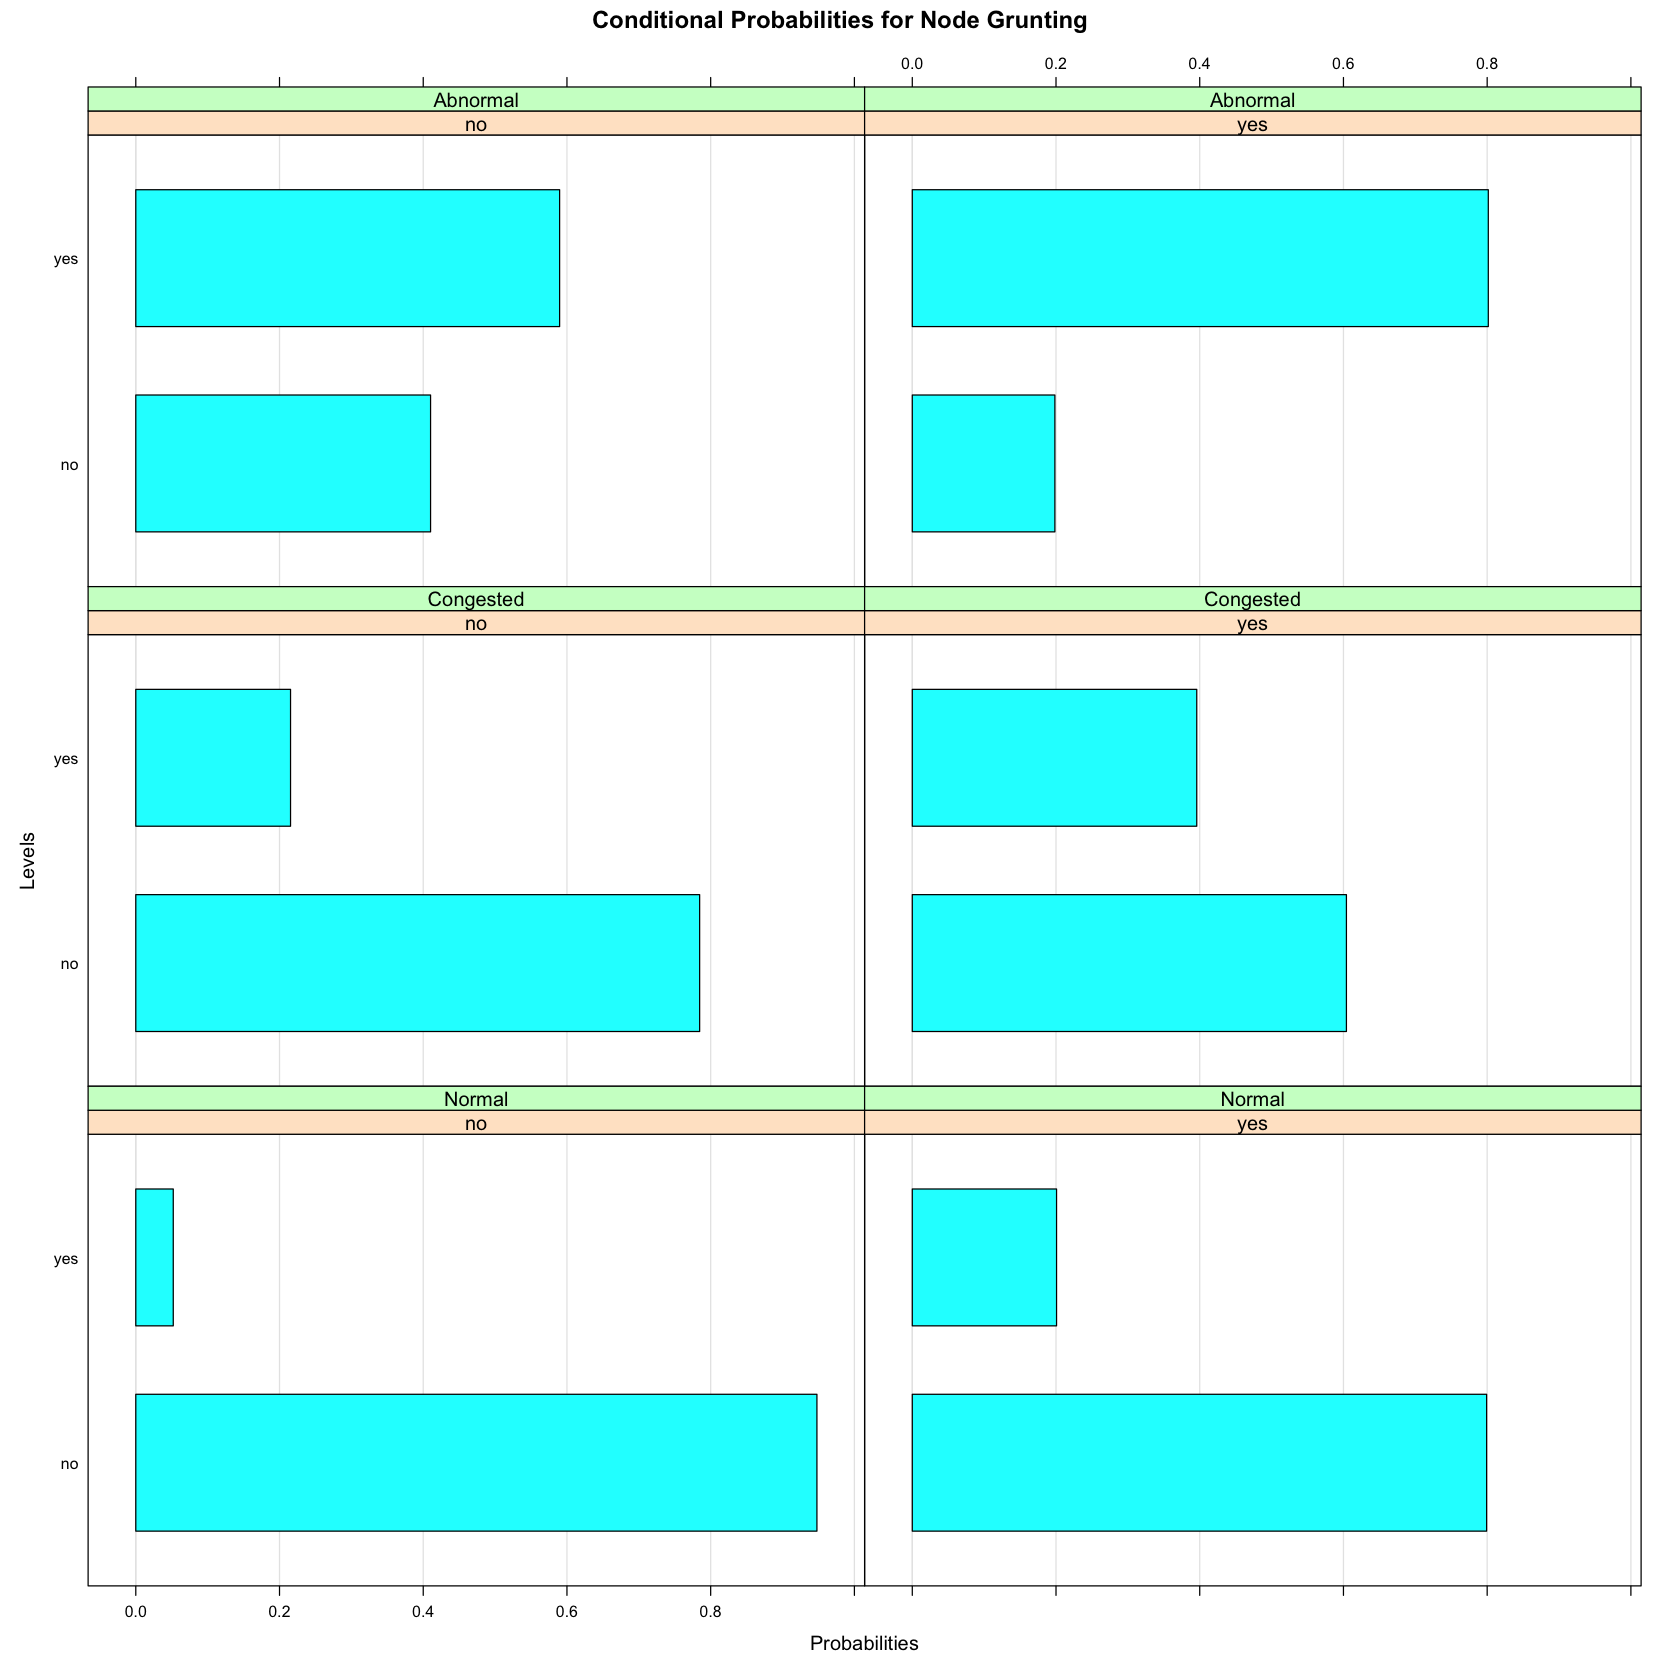

In [57]:
bn.fit.barchart(fit$Grunting)

## Learn structure and parameters through K2 algorithm

In [61]:
net <- k2.learn.net(bn_data, max.parents = 2)
for (i in 1:20){
    dag(net)[i, i] <- 0
}
print(net)

bnstruct :: learning network parameters ... 

bnstruct :: parameter learning done.




Bayesian Network: BNDataset

num.nodes 20

variables
BirthAsphyxia Disease Sick Age DuctFlow CardiacMixing LungParench LungFlow LVH Grunting HypDistrib HypoxiaInO2 CO2 ChestXray LVHreport GruntingReport LowerBodyO2 RUQO2 CO2Report XrayReport
discreteness
TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
node.sizes
2 6 2 3 3 4 3 3 2 2 2 3 3 5 2 2 3 3 2 5
Adjacency matrix:
               BirthAsphyxia Disease Sick Age DuctFlow CardiacMixing
BirthAsphyxia              0       1    0   0        0             0
Disease                    0       0    1   1        1             1
Sick                       0       0    0   1        0             0
Age                        0       0    0   0        0             0
DuctFlow                   0       0    0   0        0             0
CardiacMixing              0       0    0   0        0             0
LungParench                0       0    0   0        0             0
LungFlow               

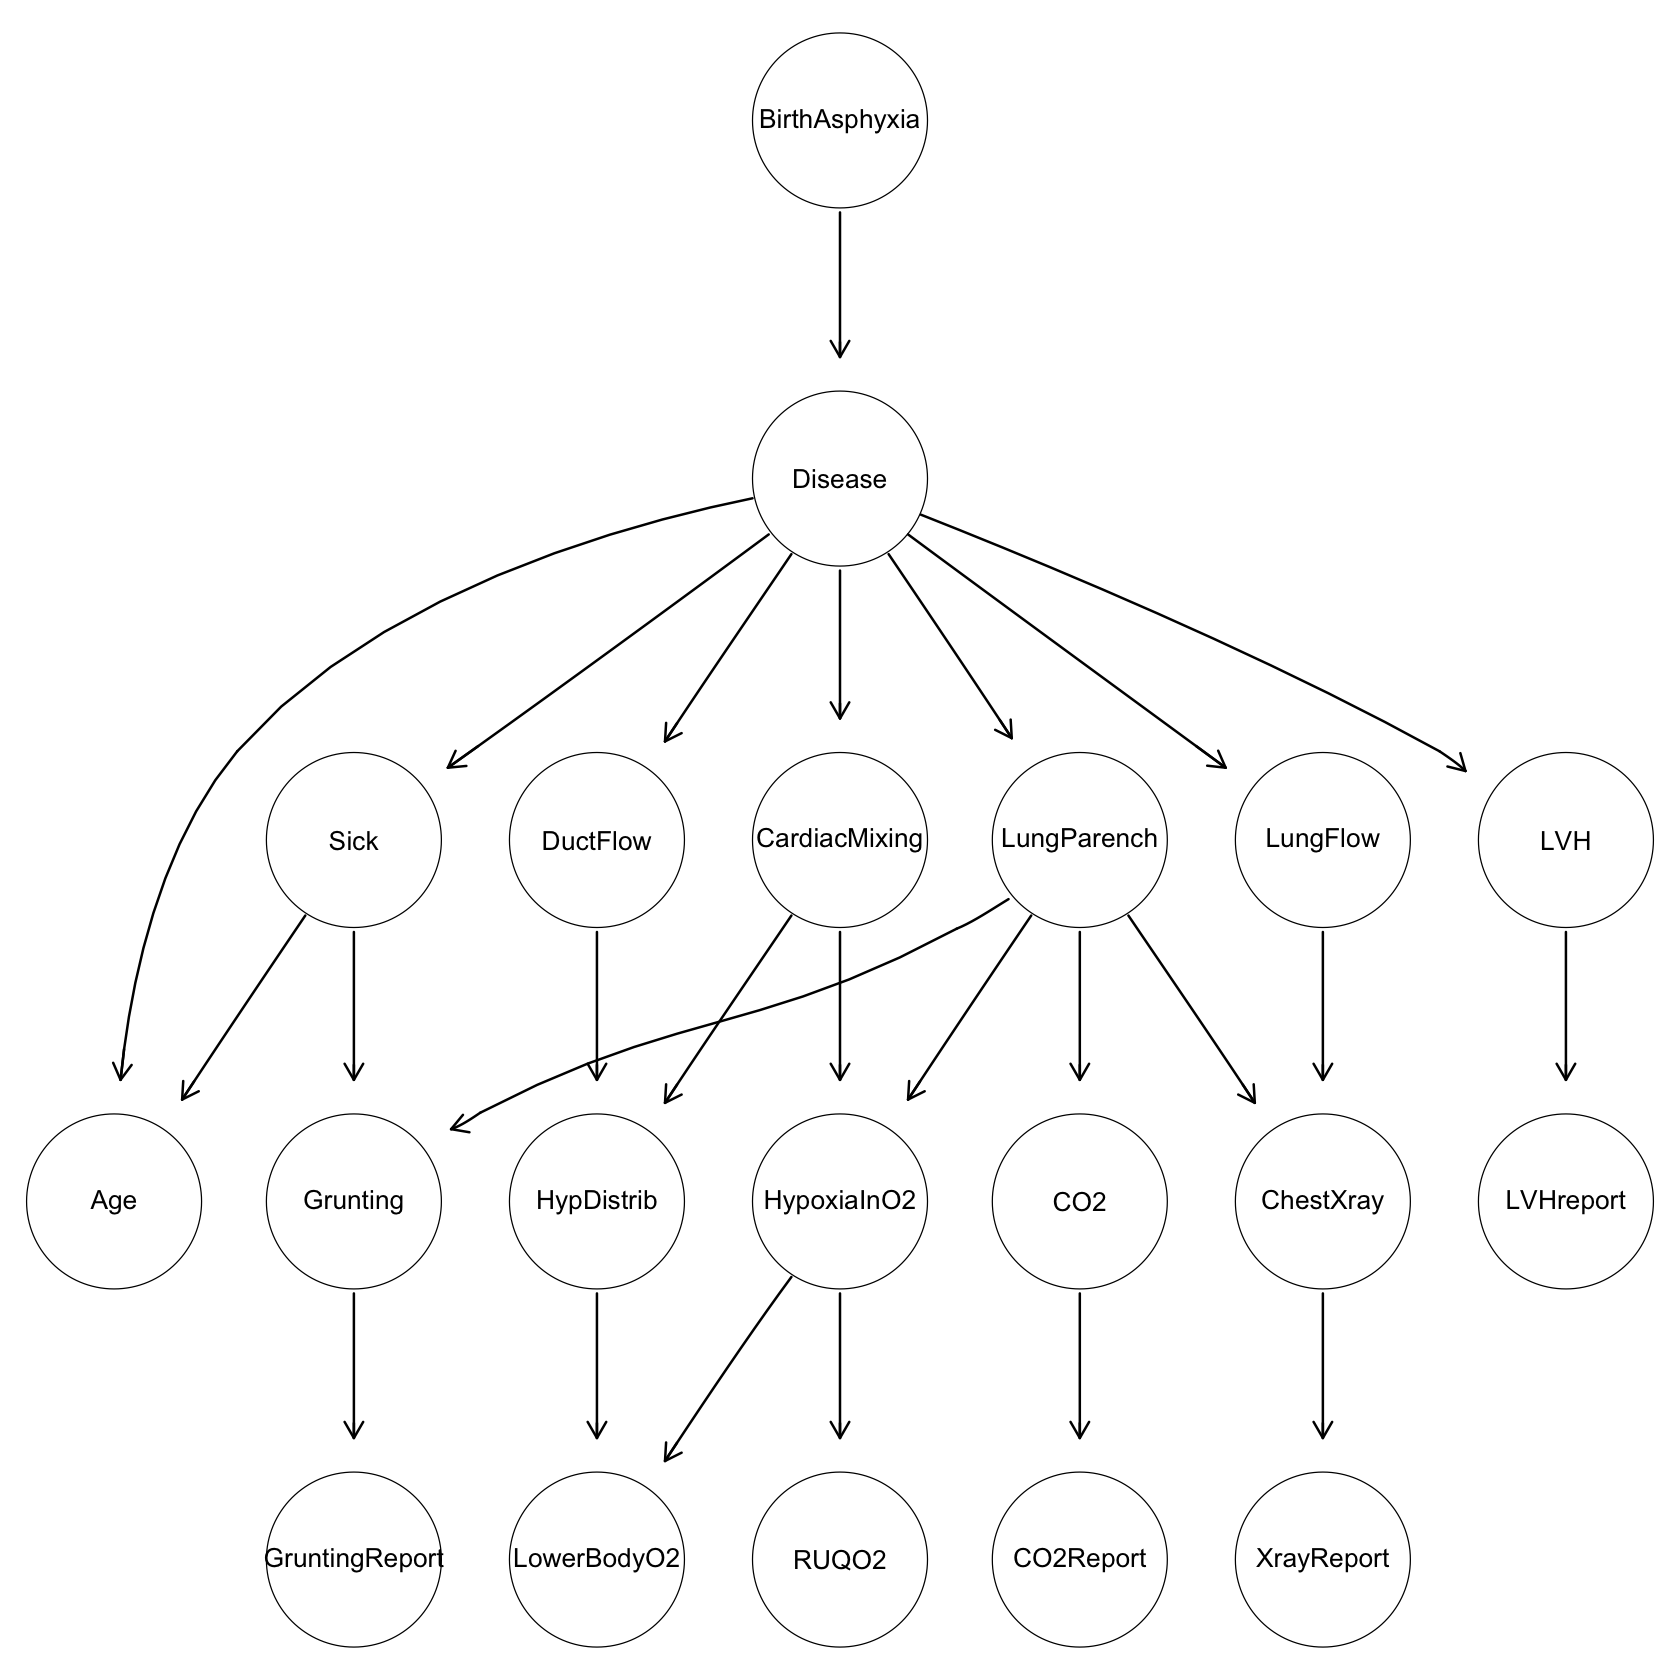

In [62]:
par(bg = "white")
plot(net, node.size.lab=32)

In [63]:
graph       <- empty.graph(variables(net))
amat(graph) <- dag(net)

In [64]:
score(graph, discrete_data, type="k2")

[1] -610170.5

In [65]:
fit <- bn.fit(graph, data = discrete_data, method = "bayes")
print(fit)


  Bayesian network parameters

  Parameters of node BirthAsphyxia (multinomial distribution)

Conditional probability table:
       no      yes 
0.900232 0.099768 

  Parameters of node Disease (multinomial distribution)

Conditional probability table:
 
        BirthAsphyxia
Disease          no        yes
  Fallot 0.29536425 0.23415522
  Lung   0.05176525 0.05073335
  PAIVS  0.23349255 0.15276803
  PFC    0.03148200 0.19767131
  TAPVD  0.05047672 0.05333935
  TGA    0.33741924 0.31133273

  Parameters of node Sick (multinomial distribution)

Conditional probability table:
 
     Disease
Sick     Fallot      Lung     PAIVS       PFC     TAPVD       TGA
  no  0.8023888 0.2992774 0.7088330 0.6021569 0.2963097 0.6997770
  yes 0.1976112 0.7007226 0.2911670 0.3978431 0.7036903 0.3002230

  Parameters of node Age (multinomial distribution)

Conditional probability table:
 
, , Sick = no

            Disease
Age              Fallot       Lung      PAIVS        PFC      TAPVD        TGA
  0-3

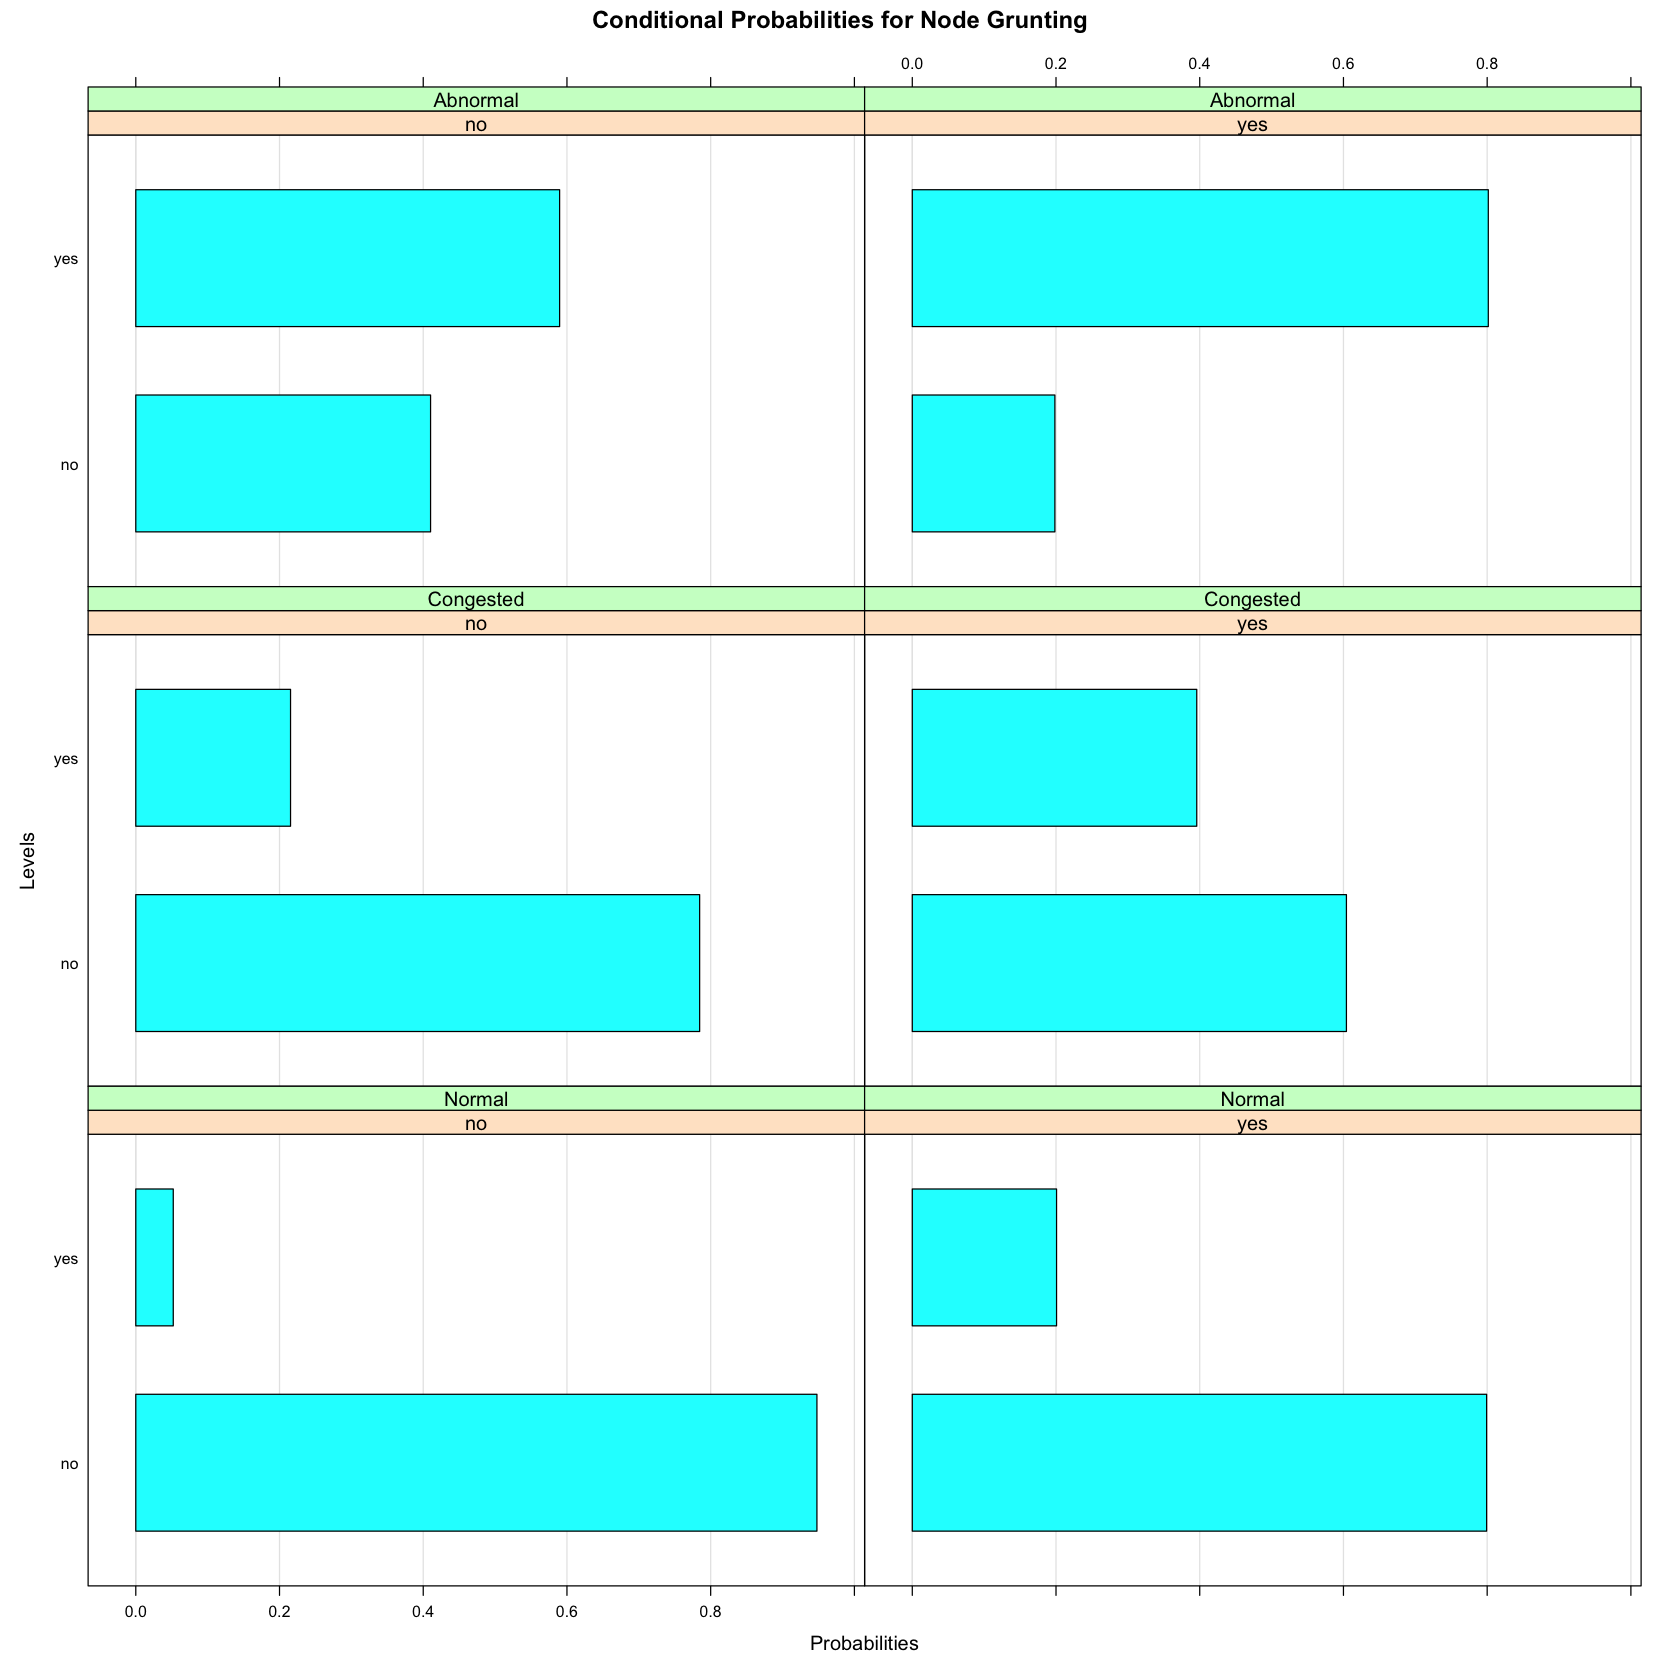

In [66]:
bn.fit.barchart(fit$Grunting)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b9007301-4f1f-446d-badb-668e7aa722f2' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>